In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
data=pd.read_csv('dataset.csv')

In [6]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
data_male=data[data.Gender=='Male']  # select male 

In [14]:
data_male

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
data.Gender.describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

Text(0.5, 0, 'income')

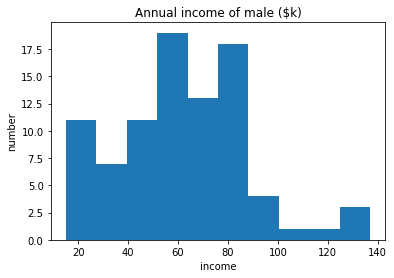

In [32]:
plt.hist(data_male.iloc[:,3],bins=10)   #
plt.title('Annual income of male ($k)')
plt.ylabel('number')
plt.xlabel('income')

In [29]:
data_male.loc[:,['Annual Income (k$)']]

,Annual Income (k$)
0,15
1,15
8,19
10,19
14,20
...,...
187,101
192,113
197,126
198,137


In [33]:
data_female=data[data.Gender=='Female']

In [34]:
data_female

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


Text(0, 0.5, 'spending')

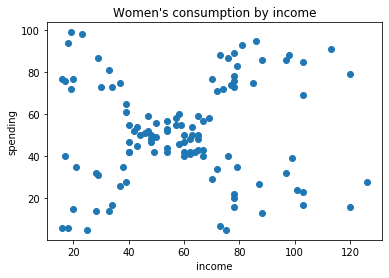

In [35]:
x=data_female.iloc[:,3]
y=data_female.iloc[:,4]

plt.scatter(x,y)
plt.title('Women\'s consumption by income')
plt.xlabel('income')
plt.ylabel('spending')

C:\Users\main\Anaconda\lib\site-packages\scipy\interpolate\interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\main\Anaconda\lib\site-packages\scipy\interpolate\interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


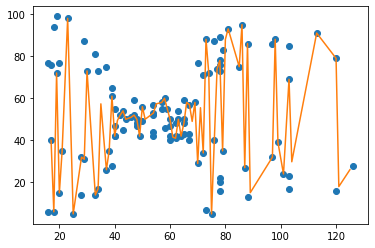

In [44]:
from scipy import interpolate
f=interpolate.interp1d(x,y,bounds_error=False, fill_value=-10)
x_new=np.arange(16,126,1)
y_new=f(x_new)
plt.plot(x,y,'o',x_new,y_new,'-')
plt.show()

Text(0, 0.5, 'Income')

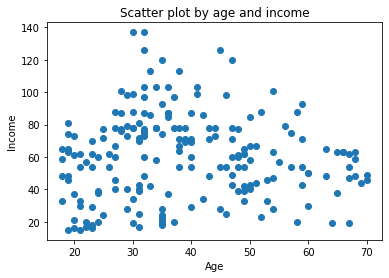

In [46]:
age=data.iloc[:,2]
income=data.iloc[:,3]
plt.scatter(age,income)
plt.title('Scatter plot by age and income')
plt.xlabel('Age')
plt.ylabel('Income')

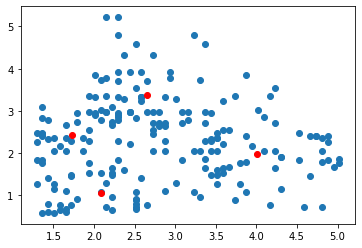

In [79]:
from scipy.cluster.vq import vq, kmeans, whiten
from numpy import array

features=np.asarray(data.iloc[:,2:4])

whitened=whiten(features)  #normalize


codebook, distortion = kmeans(whitened, 4,iter=6)
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

In [82]:
vq(whitened,codebook)

(array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
        3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
        1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2,
        0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 array([0.87223146, 0.75786956, 0.79147351, 0.62701855, 0.43730463,
        0.65385648, 0.56909705, 0.57437031, 1.39054486, 0.34476522,
        1.4935653 , 0.54462525, 1.23391954, 0.47026372, 0.64458012,
        0.58801694, 0.5008478 , 0.70011168, 1.14452623, 0.46554872,
        0.4517188 , 0.32567707, 1.22139938, 0.

In [83]:
label=pd.DataFrame(vq(whitened,codebook)[0])

In [88]:
data['label']=label  #adding label to original data

In [89]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


Text(0, 0.5, 'Income')

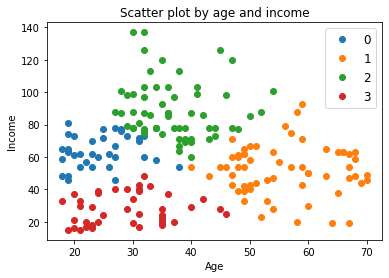

In [92]:
groups=data.groupby('label')
fig,ax=plt.subplots()
for name,group in groups:
    ax.plot(group['Age'],group['Annual Income (k$)'],
           marker='o',linestyle='',
           label=name)
ax.legend(fontsize=12, loc='upper right')  #position of legend

plt.title('Scatter plot by age and income')
plt.xlabel('Age')
plt.ylabel('Income')
